# Scikit-NeuroMSI Tutorial

This tutorial is intended to serve as a guide for using `Scikit-NeuroMSI` to implement neurocomputational models of multisensory integration.

Note: In this tutorial we assume that you already have a basic knowledge of `numpy` and `matplotlib` for scientific computing.

## Implementation of the Alais and Burr bimodal integration model

To easily implement the model developed by Alais and Burr (2004) you can import the corresponding module and instatiate the `AlaisBurr2004` class: 

In [73]:
from skneuromsi.mle import AlaisBurr2004

model = AlaisBurr2004()
model

The model object has a built-in `run` method:

In [74]:
model.run

<function skneuromsi.mle._alais_burr2004.AlaisBurr2004.run(*, auditory_position=-5, visual_position=5, auditory_sigma=3.0, visual_sigma=3.0, noise=None)>

By calling this method we can observe its arguments:

- `auditory_position`: The position where the auditory stimulus is delivered (in degrees).
- `visual_position`: The position where the visual stimulus is delivered (in degrees).
- `auditory_sigma`: Standard deviation of the auditory estimate.
- `visual_sigma`: Standard deviation of the visual estimate.

Now let's run the model for equidistant auditory and visual locations:

In [75]:
res = model.run(visual_position=-5, auditory_position=5)
res

<NDResult 'AlaisBurr2004', modes=['auditory' 'visual' 'multi'], times=1, positions=4000, positions_coordinates=1, causes=False>

The model outputs one `NDResult` object containing the results of both unisensory estimators and the multisensory estimator. To make sense of our results, let's visualise the output using its built-in `plot` method:

array([<Axes: title={'center': 'x0'}, xlabel='positions', ylabel='values'>],
      dtype=object)

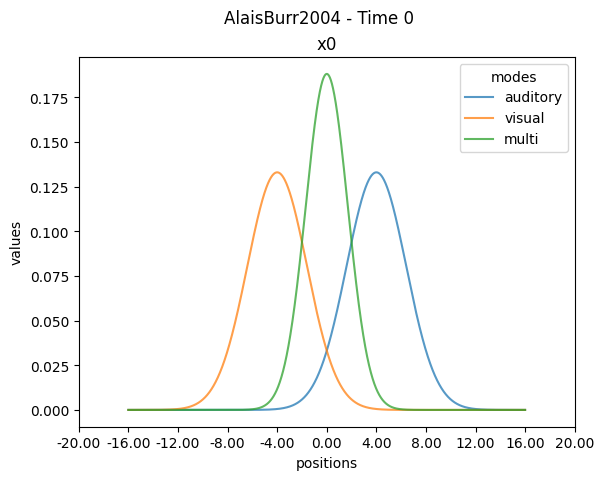

In [76]:
res.plot()

The plot shows how both auditory and visual estimates are combined into a single multisensory estimate. Now let's try a different configuration of the model run:

array([<Axes: title={'center': 'x0'}, xlabel='positions', ylabel='values'>],
      dtype=object)

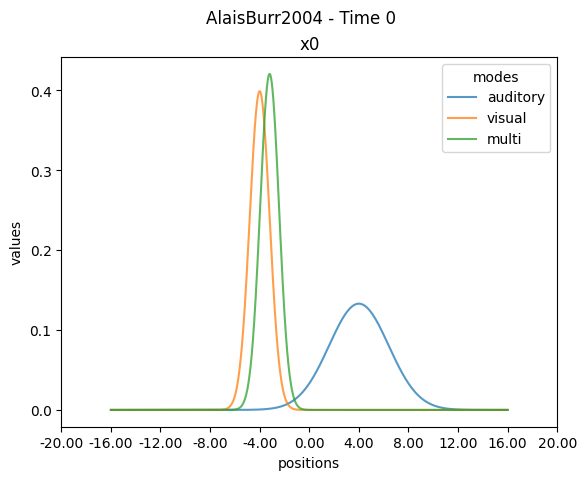

In [5]:
alter_res = model.run(
    visual_position=-5, auditory_position=5, visual_sigma=1, auditory_sigma=3
)
alter_res.plot()

In this new configuration we increased the precision of the visual estimate. By doing so, the multisensory estimate of the stimulus location is dramatically biased towards the visual estimate.

The opposite happens if we decrease the visual stimulus precision:

array([<Axes: title={'center': 'x0'}, xlabel='positions', ylabel='values'>],
      dtype=object)

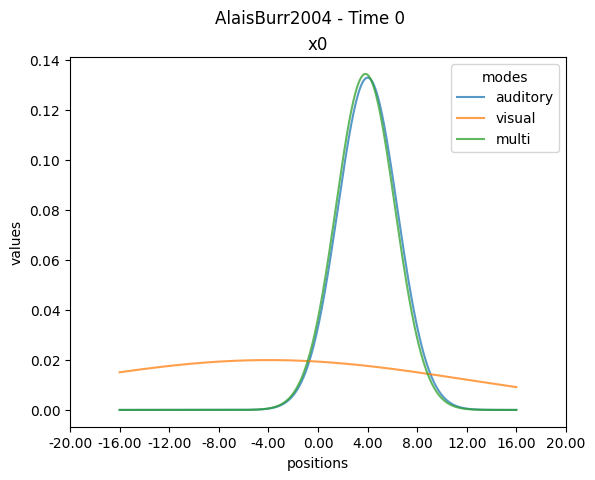

In [6]:
alter_res = model.run(
    visual_position=-5, auditory_position=5, visual_sigma=20, auditory_sigma=3
)
alter_res.plot()

By manipulating the precision of the unisensory estimates you've explored computationally the principles of the MLE estimation behind the model. Refer to the [documentation](https://scikit-neuromsi.readthedocs.io/en/latest/skneuromsi.html#skneuromsi-alais-burr2004-module) for further information about parameters to manipulate.

> This demonstration of the Alais and Burr model mechanics is inspired in the Computational Cognitive Neuroscience course materials developed by [Dr. Peggy Series](https://homepages.inf.ed.ac.uk/pseries/index.html) at The University of Edinburgh.  

### Exploration of the model object

By calling the model using the `vars` function you can explore its main built-in parameters and methods:

In [7]:
vars(model)

{'_mode0': 'auditory',
 '_mode1': 'visual',
 '_position_range': (-20, 20),
 '_position_res': 0.01,
 '_time_range': (1, 1),
 '_time_res': 1.0,
 '_random': Generator(PCG64) at 0x78B7A93084A0,
 'run': <function skneuromsi.mle._alais_burr2004.AlaisBurr2004.run(*, auditory_position=-5, visual_position=5, auditory_sigma=3.0, visual_sigma=3.0, noise=None)>}

- `mode0`: Name of the first sensory modality defined in the model.
- `mode1`: Name of the second sensory modality defined in the model.
- `position_range`: The range of possible positions where the stimulus could be delivered (in degrees).
- `position_res`: The resolution of the range of possible positions where the stimulus could be delivered (in degrees).
- `time_range`: The range of possible times when the stimulus could be delivered. Here is set to 1 because the model has no temporal dimension.
- `time_res`: The resolution of the range of possible times when the stimulus could be delivered.
- `run`: Executes the model and saves the result. 

We can re-implement Alais and Burr (2004) model with different sensory modalities and position ranges by modifying the initial parameters of the model:

array([<Axes: title={'center': 'x0'}, xlabel='positions', ylabel='values'>],
      dtype=object)

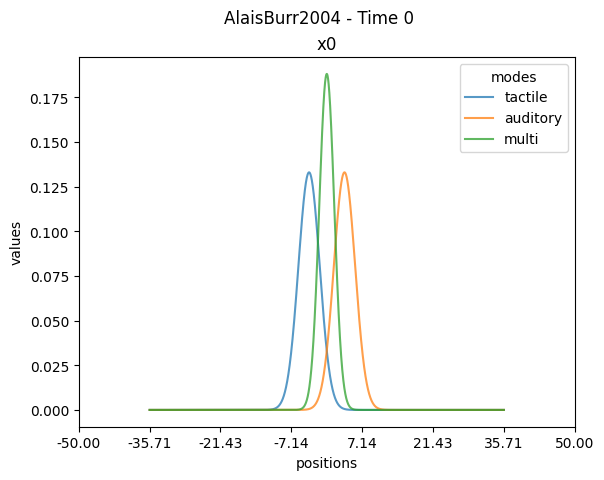

In [8]:
model = AlaisBurr2004(
    mode0="tactile", mode1="auditory", position_range=(-50, 50)
)
res = model.run()
res.plot()

## Implementation of the Kording Bayesian Causal Inference model

You can implement the model Causal Inference model developed by Kording et al. (2007) by importing the corresponding module and instantiating the `Kording2007` class:

In [102]:
from skneuromsi.bayesian import Kording2007

model = Kording2007(position_range=(-20, 20), position_res=1)

You can refer to the [documentation](https://scikit-neuromsi.readthedocs.io/en/latest/api.html#module-skneuromsi-kording2007) for more details about the available parameters.

Let's run the model for two conflicting stimulus locations:

array([<Axes: title={'center': 'x0'}, xlabel='positions', ylabel='values'>],
      dtype=object)

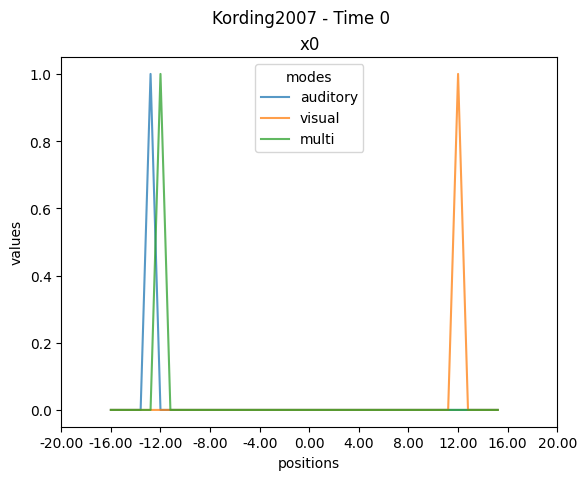

In [103]:
res = model.run(auditory_position=-15, visual_position=15)
res.plot()

The model outputs the unisensory estimates as being apart and centered around the given locations (-15 and 15 for the auditory and visual modality respectively).

Now let's see what happens if we reduce the distance of the stimuli:

array([<Axes: title={'center': 'x0'}, xlabel='positions', ylabel='values'>],
      dtype=object)

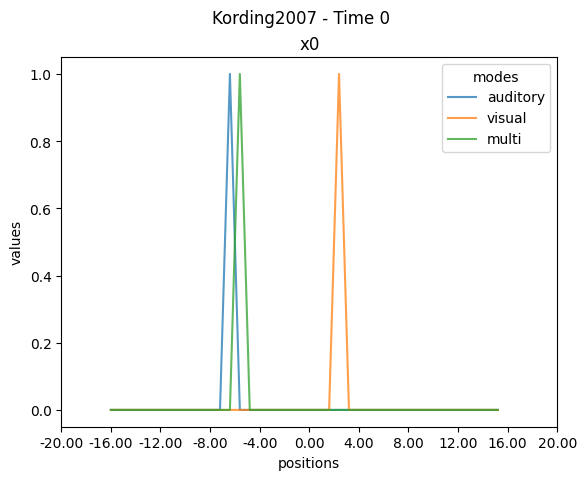

In [107]:
res = model.run(auditory_position=-5, visual_position=5, causes_kind="count")
res.plot()

The model shows how the less precise stimulus location (in this case, visual) is biased towards the more precise one. This happens because the model is computing the unisensory estimates based on the probability of the stimuli originating from a common source. 

We can directly observe the probability of the stimuli originating from a common cause:

In [108]:
print("p(C=1):", res.e_["p_common_cause"])
print("C:", res.causes_)

p(C=1): [0.34307979]
C: 2


> This demonstration of the Bayesian Causal Inference model mechanics is inspired in the tutorial of the [BCIT Toolbox](https://github.com/multisensoryperceptionlab/BCIT/blob/master/Documentation/BCIT_Documentation_5.1.2017.pdf).

## Parameter Sweeps

You can simulate multisensory integration experiments using the `ParameterSweep` class. Here we simulate the responses of the network model developed by Cuppini et al. (2017) on an  
spatial disparity paradigm (ventriloquist effect). The `ParameterSweep` class requires to specify a `target` run parameter and the its `range` of values.  

In [167]:
from skneuromsi.sweep import ParameterSweep
from skneuromsi.neural import Cuppini2017
import numpy as np

## Model setup
model_cuppini2017 = Cuppini2017(neurons=90, position_range=(0, 90))

## Sweep setup
spatial_disparities = np.array([-24, -12, -6, -3, 3, 6, 12, 24])

sp_cuppini2017 = ParameterSweep(
    model=model_cuppini2017,
    target="visual_position",
    repeat=1,
    range=45 + spatial_disparities,
)

Now we call the `run` method of the `ParameterSweep` object. Here we can define the run parameters of the model for each iteration.

In [164]:
## Sweep run
res_sp_cuppini2017 = sp_cuppini2017.run(
    auditory_position=45, auditory_sigma=4.5, visual_sigma=3.5
)

Sweeping 'visual_position':   0%|          | 0/8 [00:00<?, ?it/s]

The output of the `ParameterSweep` `run` method is an `NDResultCollection`.

In [165]:
res_sp_cuppini2017

<NDResultCollection 'ParameterSweep' len=8>

We can call its internal method `disparity_matrix` to visualize the parameter values of each model run during this iterative process. Note how all paramters remain fixed but `visual_position` (our `target` parameter).

In [58]:
res_sp_cuppini2017.disparity_matrix()

Sweeping 'visual_position':   0%|          | 0/8 [00:00<?, ?it/s]

Parameters,auditory_position,visual_position,auditory_sigma,visual_sigma,auditory_intensity,visual_intensity,auditory_duration,auditory_onset,auditory_stim_n,visual_duration,...,auditory_soa,visual_soa,noise,noise_level,feedforward_weight,cross_modal_weight,causes_kind,causes_dim,causes_peak_threshold,causes_peak_distance
0,45,21,4.5,3.5,28,27,None,0,1,None,...,None,None,False,0.4,18,1.4,count,space,0.15,None
1,45,33,4.5,3.5,28,27,None,0,1,None,...,None,None,False,0.4,18,1.4,count,space,0.15,None
2,45,39,4.5,3.5,28,27,None,0,1,None,...,None,None,False,0.4,18,1.4,count,space,0.15,None
3,45,42,4.5,3.5,28,27,None,0,1,None,...,None,None,False,0.4,18,1.4,count,space,0.15,None
4,45,48,4.5,3.5,28,27,None,0,1,None,...,None,None,False,0.4,18,1.4,count,space,0.15,None
5,45,51,4.5,3.5,28,27,None,0,1,None,...,None,None,False,0.4,18,1.4,count,space,0.15,None
6,45,57,4.5,3.5,28,27,None,0,1,None,...,None,None,False,0.4,18,1.4,count,space,0.15,None
7,45,69,4.5,3.5,28,27,None,0,1,None,...,None,None,False,0.4,18,1.4,count,space,0.15,None


We can compute cross-modal sensory bias by calling the method `bias`:

> Here sensory bias is defined as the spatial disparity between the position of the auditory stimulus and the position detected by each model, divided by the distance between the auditory and visual stimuli.

In [166]:
res_sp_cuppini2017.bias(influence_parameter="auditory_position", mode="multi")

Calculating biases:   0%|          | 0/8 [00:00<?, ?it/s]

Changing parameter,visual_position
Influence parameter,auditory_position
Iteration,0
Disparity,
-24,0.000000
-12,0.000000
-6,0.500000
-3,0.666667
3,0.666667
6,0.500000
12,0.000000


We can compute causal inference responses by calling the method `causes`:

> Here causal inference is defined as the number of causes detected by the model out of the multiple sensory inputs.

In [91]:
res_sp_cuppini2017.causes()

Causes,visual_position
Disparity,
0,0.0
12,0.0
18,1.0
21,1.0
27,1.0
30,1.0
36,0.0
48,0.0


Both `bias` and `causes` methods have built-in plotting functions: 

<Axes: xlabel='Disparity'>

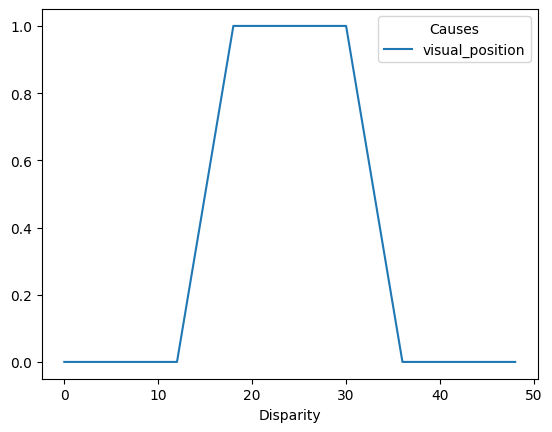

In [92]:
res_sp_cuppini2017.causes().plot()

### Processing Strategy

You can personalize parameter sweeps outputs by creating processing strategies with the `ProcessingStrategyABC` class. Here we define a processing strategy to extract the causal inference responses of the model:

In [94]:
from skneuromsi.sweep import ProcessingStrategyABC


class CausesProcessingStrategy(ProcessingStrategyABC):
    def map(self, result):
        causes = result.causes_
        return causes

    def reduce(self, results, **kwargs):
        return np.array(results)

Now we can input our `CausesProcessingStrategy` to a custom `ParameterSweep` object:

In [ ]:
causes_sp_cuppini2017 = ParameterSweep(
    model=model_cuppini2017,
    target="visual_position",
    repeat=1,
    range=45 + spatial_disparities,
    processing_strategy=CausesProcessingStrategy(),
)

Sweeping 'visual_position':   0%|          | 0/8 [00:00<?, ?it/s]

Now we run our custom `ParameterSweep`: 

In [ ]:
res = causes_sp_cuppini2017.run(causes_kind="prob")
res

array([0.82413899, 0.99838057, 0.99841585, 0.99837658, 0.99837658,
       0.99841585, 0.99838057, 0.82413899])

Note how the output is now an `numpy.array` object, as we defined previously in our `CausesProcessingStrategy` class. Here the causal inference output is defined as probabilities following the `causes_kind` method available in the `Cuppini2017` model. 

### Compare models

You can streamline model comparison by leveraging `ParameterSweep` and `ProcessingStrategyABC` classes. Here we compare causal inference responses of the `Kording2007` and the `Cuppini2017` models in the previously defined spatial disparity paradigm.

In [162]:
# Models setup
model_kording = Kording2007(position_range=(0, 90), position_res=1)
model_cuppini2017 = Cuppini2017(
    neurons=90, position_range=(0, 90), position_res=1
)


# Sweeps setup with causes processing strategy
causal_sp_kording = ParameterSweep(
    model=model_kording,
    target="visual_position",
    repeat=1,
    range=45 + spatial_disparities,
    processing_strategy=CausesProcessingStrategy(),
)

causal_sp_cuppini2017 = ParameterSweep(
    model=model_cuppini2017,
    target="visual_position",
    repeat=1,
    range=45 + spatial_disparities,
    processing_strategy=CausesProcessingStrategy(),
)

## Sweeps run
res_kording_causes = causal_sp_kording.run(
    auditory_position=45,
    auditory_sigma=8,
    visual_sigma=8,
    strategy="selection",
    noise=False,
    prior_mu=69,
    prior_sigma=45,
    causes_kind="prob",
)

res_cuppini2017_causes = causal_sp_cuppini2017.run(
    auditory_position=45,
    auditory_sigma=28,
    visual_sigma=8,
    auditory_intensity=13,
    visual_intensity=24,
    noise=False,
    causes_kind="prob",
)

Sweeping 'visual_position':   0%|          | 0/8 [00:00<?, ?it/s]

Sweeping 'visual_position':   0%|          | 0/8 [00:00<?, ?it/s]

We can easily generate plots of the outcomes of our sweeping routines:

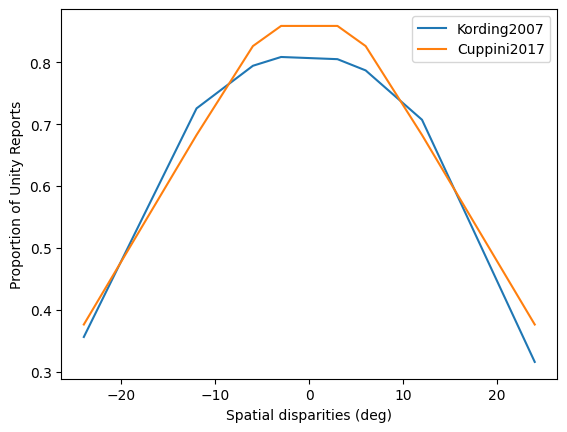

In [163]:
import matplotlib.pyplot as plt

plt.plot(spatial_disparities, res_kording_causes, label="Kording2007")
plt.plot(spatial_disparities, res_cuppini2017_causes, label="Cuppini2017")
plt.xlabel("Spatial disparities (deg)")
plt.ylabel("Proportion of Unity Reports")
plt.legend()

Refer to documentation for more details on the `NDResultCollection` functionalities.

## Build your own Scikit-NeuroMSI model!

You can implement your own model by importing the `SKNMSIMethodABC` method from the `core` module and creating a class calling such method. 

Such class must have four attributes to define the model's identity and input/output modalities: 
- `_model_name`: Name of the model.
- `_model_type`: Classification of the model (e.g. MLE, Bayesian, Neural, etc).
- `_run_input`: Modality specific parameters computed by the model. 
- `_run_output`: Modality specific results delivered by the model.

Furthermore, the class must have six managed attributes (properties) defined in the `init` method:
- `mode0`: Name of sensory modality 0.
- `mode1`: Name of sensory modality 1.
- `position_range`: Range of positions encoded by the model.
- `position_res`: Resolution of positional encoding.
- `time_range`: Range of times encoded by the model.
- `time_res`: Resolution of time encoding.

> The model may include more than two sensory modalities, as long as they are properly defined in the class.

Finally, the class must have two methods to specify the model execution:
- `set_random`: Sets random seed (if required).
- `run`: Executes the model

Here a template of a Scikit-NeuroMSI model class:

In [ ]:
from skneuromsi.core import SKNMSIMethodABC


class MyBayesianModel(SKNMSIMethodABC):
    _model_name = "MyBayesianModel"
    _model_type = "Bayesian"
    _output_mode = "multi"

    _run_input = [
        {"target": "auditory_position", "template": "${mode0}_position"},
        {"target": "visual_position", "template": "${mode1}_position"},
    ]

    _run_output = [
        {"target": "auditory", "template": "${mode0}"},
        {"target": "visual", "template": "${mode1}"},
    ]

    def __init__(
        self,
        *,
        mode0="auditory",
        mode1="visual",
        position_range=(0, 29),
        position_res=1,
        time_range=(1, 2),
        time_res=1,
    ):
        self._mode0 = mode0
        self._mode1 = mode1
        self._position_range = position_range
        self._position_res = float(position_res)
        self._time_range = time_range
        self._time_res = float(time_res)

    # PROPERTY ================================================================

    @property
    def mode0(self):
        return self._mode0

    @property
    def mode1(self):
        return self._mode1

    @property
    def time_range(self):
        return self._time_range

    @property
    def time_res(self):
        return self._time_res

    @property
    def position_range(self):
        return self._position_range

    @property
    def position_res(self):
        return self._position_res

    # MODEL RUN ================================================================

    def set_random():
        pass

    def run(auditory_position, visual_position): ...

For more details about model building, please refer to the [documentation](https://scikit-neuromsi.readthedocs.io/en/latest/api.html#module-skneuromsi.core). 